# **Imports & Setup**

This section imports the core Python libraries required for exploratory data analysis.

Pandas is used for data manipulation and analysis, Matplotlib and Seaborn are used for data visualization.

The Seaborn style is set to whitegrid to improve chart readability and provide a clean visual appearance.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


# **Load Data**

This step loads the retail sales dataset from the raw data folder into a Pandas DataFrame.

The head() function displays the first few rows, allowing quick verification of the dataset structure, column names, and sample values before proceeding with analysis.

In [ ]:
retail_data = pd.read_csv("/content/data/raw/retail_sales_dataset.csv")
retail_data.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100


# **Basic Info**

This section provides an overview of the dataset structure and summary statistics.

The info() method shows the number of rows, columns, data types, and missing values, confirming data completeness.

The describe() method generates statistical summaries such as mean, minimum, maximum, and percentiles for numerical columns, helping identify trends, ranges, and potential outliers.

In [ ]:
retail_data.info()
retail_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


# **Sales by Product Category**

This analysis groups transactions by product category and calculates total sales for each category.

The bar chart visually compares revenue across different product categories, making it easy to identify top-performing and low-performing categories.

This insight helps understand customer preferences and revenue distribution across product lines.

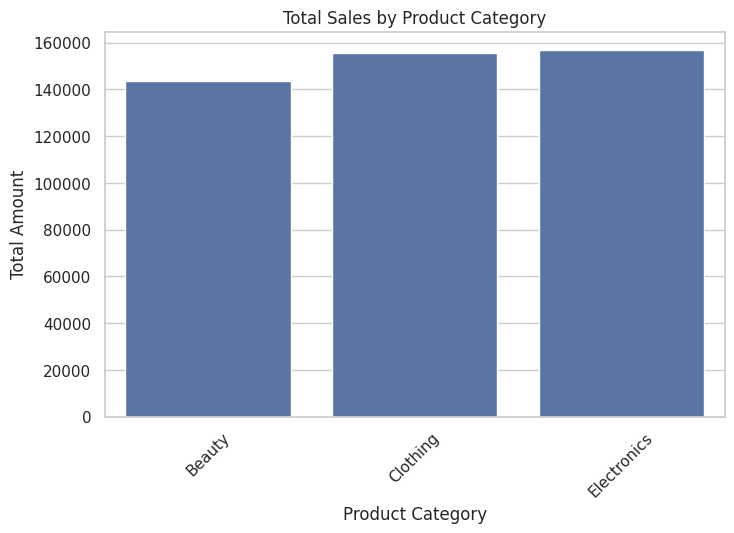

In [ ]:
category_sales = retail_data.groupby("Product Category")["Total Amount"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x="Product Category", y="Total Amount")
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.show()


# **Gender-wise Spending**

This visualization analyzes total spending based on customer gender.

The pie chart represents the proportion of total sales contributed by each gender group, providing insight into gender-based purchasing behavior and customer segmentation.

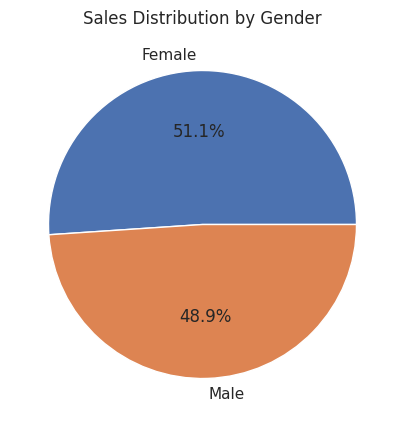

In [ ]:
gender_sales = retail_data.groupby("Gender")["Total Amount"].sum()

gender_sales.plot(kind="pie", autopct="%1.1f%%", figsize=(5,5))
plt.title("Sales Distribution by Gender")
plt.ylabel("")
plt.show()


# **Age vs Spending**

This scatter plot explores the relationship between customer age and total spending.

Each point represents a transaction, and color coding by gender highlights spending patterns across age groups.

This analysis helps identify age segments with higher purchasing power and behavioral differences between genders.

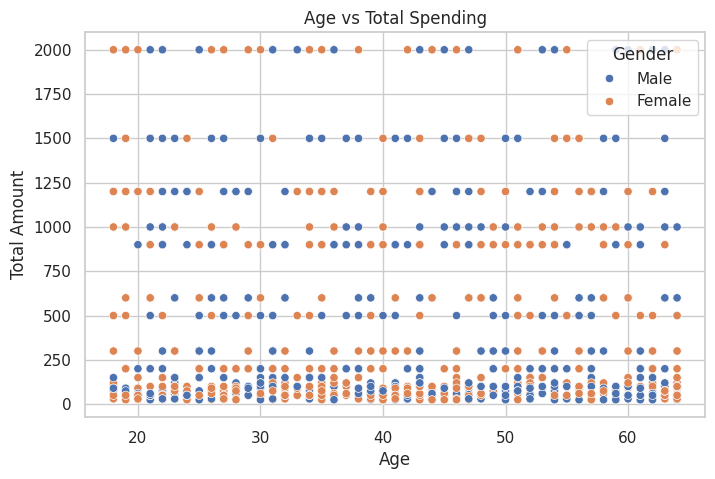

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=retail_data, x="Age", y="Total Amount", hue="Gender")
plt.title("Age vs Total Spending")
plt.show()
